<h1><center>Laboratorio 10: Adivina, Adivinador 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Diego Espinoza
- Nombre de alumno 2: Juan Miño

### **Link de repositorio de GitHub:** [Laboratorio 10: MDS7202](https://github.com/juansebm/MDS7202)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [3]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [4]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [ ]:
path_energiahomer = "energia_homero.csv"
homero_df = pd.read_csv(path_energiahomer) 
homero_df['date'] = pd.to_datetime(homero_df['date'])

homero_df.head()

,date,Energy_kWh
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195


## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [6]:
# 0
train = homero_df[homero_df['date'] <= '2020-02-29'].copy()
test  = homero_df[homero_df['date'] >= '2020-03-01'].copy()

target = 'Energy_kWh'

X_train = train[['date']].copy()
y_train = train[target].copy()

X_test  = test[['date']].copy()
y_test  = test[target].copy()


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):

        self.init_date = None

    def fit(self, X, y=None):
        self.init_date = X.date.iloc[0]

        return self

    def transform(self, X):
        X = X.copy()
        final_date = X.date.iloc[-1] 

        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]

    def fit_transform(self, X, y=None):

        X = X.copy()
        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] 

        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]

In [8]:
# 1
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

Pipeline_trend = Pipeline([
    ('time_features', TimeTransformer()),
    ('ols', LinearRegression())
])

In [ ]:
# 2 creamos el modelo lineal
from sklearn.metrics import mean_absolute_error

Pipeline_trend.fit(X_train, y_train)
train_pred = Pipeline_trend.predict(X_train)
test_pred = Pipeline_trend.predict(X_test)

y_pred = np.concatenate([train_pred, test_pred])
mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)

print(f'Train MAE : {mae_train:.2f}')
print(f'Test MAE : {mae_test:.2f}')

Train MAE : 10.57
Test MAE : 8.66


In [ ]:
# 3 graficamos errores
error_train = y_train - train_pred
error_test = y_test - test_pred
error = pd.concat([error_train, error_test])

fig = px.line(x = homero_df.date, y=error, title='Error en la predicción')
fig.show()

Hay comportamiento estacional con incremento entre Mayo y Octubre para todos los años.

In [11]:
# 4 nuevo pipeline

from sklearn.base import BaseEstimator, TransformerMixin

class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, n = 4, p = 365):

        self.init_date = None
        self.n = n
        self.p = p

    def fit(self, X, y=None):
        self.init_date = X.date.iloc[0]

    def transform(self, X):

        X = X[['date']].copy()

        final_date = X.index[-1]
        final_date = X.date.iloc[-1]

        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def fit_transform(self, X, y=None):
        X = X[['date']].copy()

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] 

        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def get_fourier_terms(self, serie, n, p):
        terms = []
        for i in range(1, n + 1):
            sine_term = np.sin(2 * np.pi * i * serie / p)
            cosine_term = np.cos(2 * np.pi * i * serie / p)
            terms.extend([sine_term, cosine_term])

        fourier = np.column_stack(terms)
        fourier = pd.DataFrame(fourier, columns = [f'fourier_{i}' for i in range(n * 2)], index = serie.index)
        return fourier

Pipeline_seasonal = Pipeline([
    ('time_features', TimeTransformer(n = 5, p = 365)),
    ('ols', LinearRegression())
])

In [12]:
# 5 nuevo MAE
from sklearn.metrics import mean_absolute_error

Pipeline_seasonal.fit(X_train, y_train)
train_pred = Pipeline_seasonal.predict(X_train)
test_pred = Pipeline_seasonal.predict(X_test)

y_pred = np.concatenate([train_pred, test_pred])
mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)

print(f'Train MAE : {mae_train:.2f}')
print(f'Test MAE : {mae_test:.2f}')

Train MAE : 5.34
Test MAE : 4.48


In [ ]:
# 6 graficamos los  errores
error_train = y_train - train_pred
error_test = y_test - test_pred
error = pd.concat([error_train, error_test])

fig = px.line(x = homero_df.date, y=error, title='Error en la predicción')
fig.show()

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [14]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

In [ ]:
# 1
df_prophet = homero_df.rename(columns={"date": "ds", "Energy_kWh": "y"})

train = df_prophet[df_prophet['ds'] <= '2020-02-29'].copy()
test = df_prophet[df_prophet['ds'] >= '2020-03-01'].copy()

In [16]:
# 2
modelo = Prophet()
modelo.fit(train)

future = test[['ds']].copy()

forecast = modelo.predict(future)
forecast

21:44:56 - cmdstanpy - INFO - Chain [1] start processing
21:44:56 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-01,18.699825,1.704675,19.187885,18.699825,18.699825,-8.140903,-8.140903,-8.140903,1.682858,1.682858,1.682858,-9.823761,-9.823761,-9.823761,0.0,0.0,0.0,10.558922
1,2020-03-02,18.693244,-0.166222,17.579985,18.693244,18.693244,-10.343161,-10.343161,-10.343161,-0.335130,-0.335130,-0.335130,-10.008030,-10.008030,-10.008030,0.0,0.0,0.0,8.350083
2,2020-03-03,18.686663,-1.295991,15.809225,18.686663,18.686663,-10.972545,-10.972545,-10.972545,-0.799480,-0.799480,-0.799480,-10.173065,-10.173065,-10.173065,0.0,0.0,0.0,7.714119
3,2020-03-04,18.680083,-0.546704,17.044310,18.680083,18.680083,-10.843353,-10.843353,-10.843353,-0.530852,-0.530852,-0.530852,-10.312501,-10.312501,-10.312501,0.0,0.0,0.0,7.836730
4,2020-03-05,18.673502,-0.722712,16.567736,18.673502,18.673502,-10.846925,-10.846925,-10.846925,-0.426333,-0.426333,-0.426333,-10.420593,-10.420593,-10.420593,0.0,0.0,0.0,7.826577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2020-07-03,17.883811,20.992365,38.559392,17.399044,18.385253,12.190076,12.190076,12.190076,-0.667305,-0.667305,-0.667305,12.857381,12.857381,12.857381,0.0,0.0,0.0,30.073887
125,2020-07-04,17.877230,23.296122,40.709280,17.388218,18.386452,14.025816,14.025816,14.025816,1.076242,1.076242,1.076242,12.949574,12.949574,12.949574,0.0,0.0,0.0,31.903046
126,2020-07-05,17.870650,23.703791,41.556806,17.376899,18.389405,14.729867,14.729867,14.729867,1.682858,1.682858,1.682858,13.047009,13.047009,13.047009,0.0,0.0,0.0,32.600516
127,2020-07-06,17.864069,22.122058,39.083472,17.361627,18.388509,12.811602,12.811602,12.811602,-0.335130,-0.335130,-0.335130,13.146732,13.146732,13.146732,0.0,0.0,0.0,30.675670


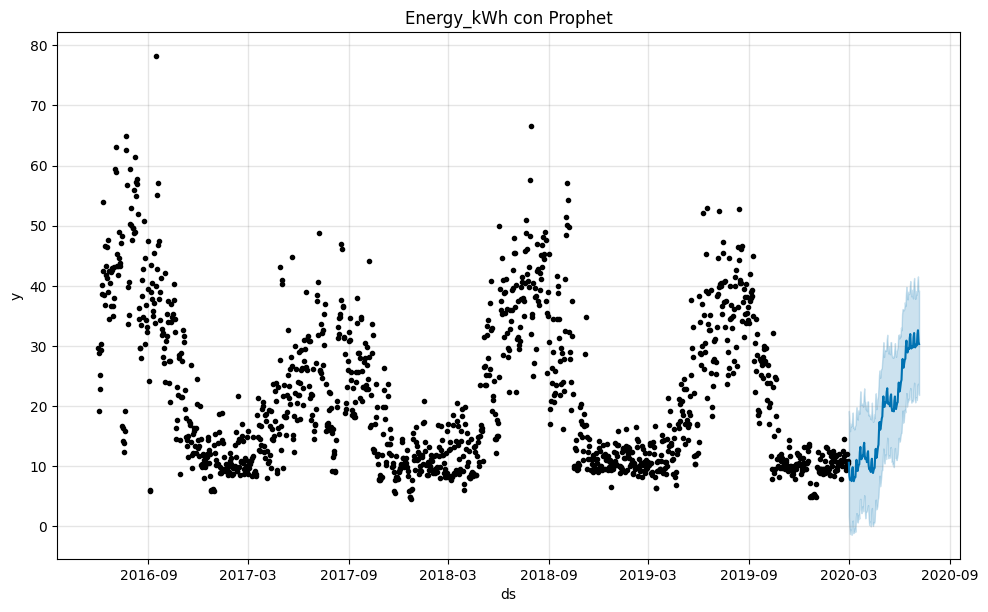

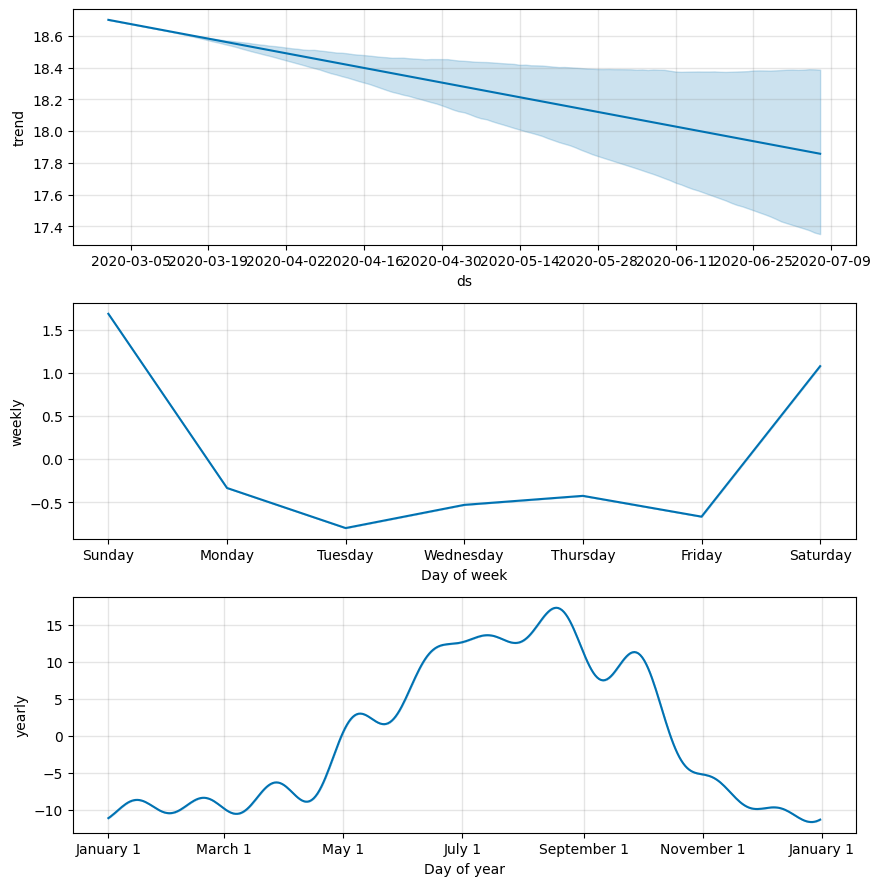

In [17]:
# 3
modelo.plot(forecast)
plt.title("Energy_kWh con Prophet")
plt.show()

modelo.plot_components(forecast)
plt.show()

In [18]:
# 4
y_pred_test = forecast['yhat'].values
y_true_test = test['y'].values
mae_test = mean_absolute_error(y_true_test, y_pred_test)

forecast_train = modelo.predict(train[['ds']])
mae_train = mean_absolute_error(train['y'], forecast_train['yhat'])

print(f"train MAE: {mae_train:.2f}")
print(f"test MAE: {mae_test:.2f}")

train MAE: 4.82
test MAE: 4.88


In [19]:
# 5
train_pred = forecast_train['yhat'].values
y_train = train['y'].values

error_train = y_train - train_pred
error_test = y_true_test - y_pred_test

error = pd.concat([pd.Series(error_train, index=train['ds']), pd.Series(error_test, index=test['ds'])])

fig = px.line(x=error.index, y=error.values, labels={'x': 'Fecha', 'y': 'Error'},
              title='Error en predicción')
fig.show()

Hay indicios de comportamiento estacional en la serie.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [20]:
# 0
clima_df = pd.read_csv("datos_frink.csv")
clima_df['date'] = pd.to_datetime(clima_df['date'])

df_completo = homero_df.merge(clima_df, on='date')

df_completo = df_completo.rename(columns={"date": "ds", "Energy_kWh": "y"})

train = df_completo[df_completo['ds'] <= '2020-02-29'].copy()
test  = df_completo[df_completo['ds'] >= '2020-03-01'].copy()


In [21]:
# 1 modelo prophet
regresores = [col for col in df_completo.columns if col not in ['ds', 'y']]
modelo_reg = Prophet()

for reg in regresores:
    modelo_reg.add_regressor(reg)

modelo_reg.fit(train)

21:44:57 - cmdstanpy - INFO - Chain [1] start processing
21:44:57 - cmdstanpy - INFO - Chain [1] done processing


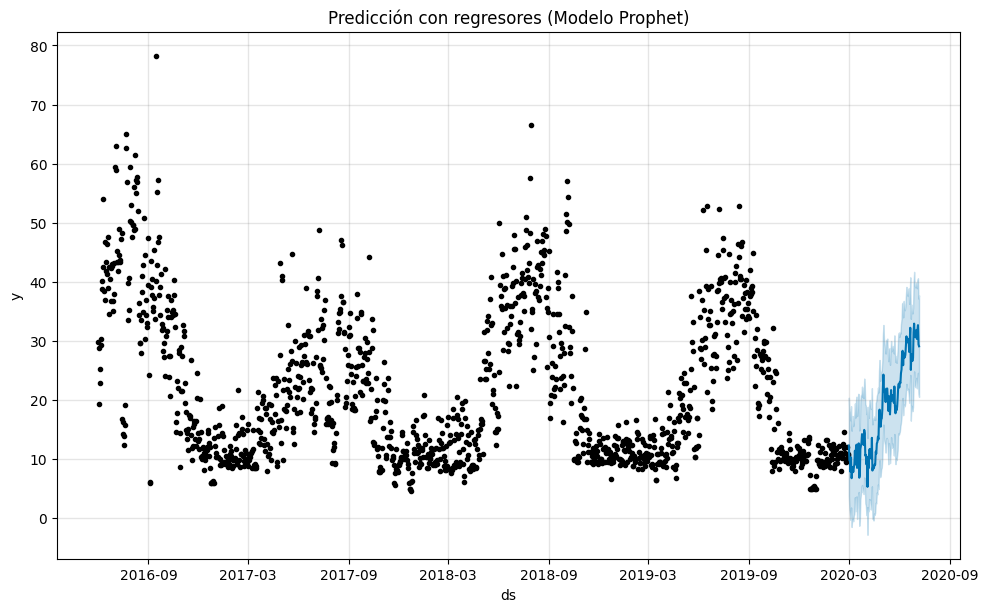

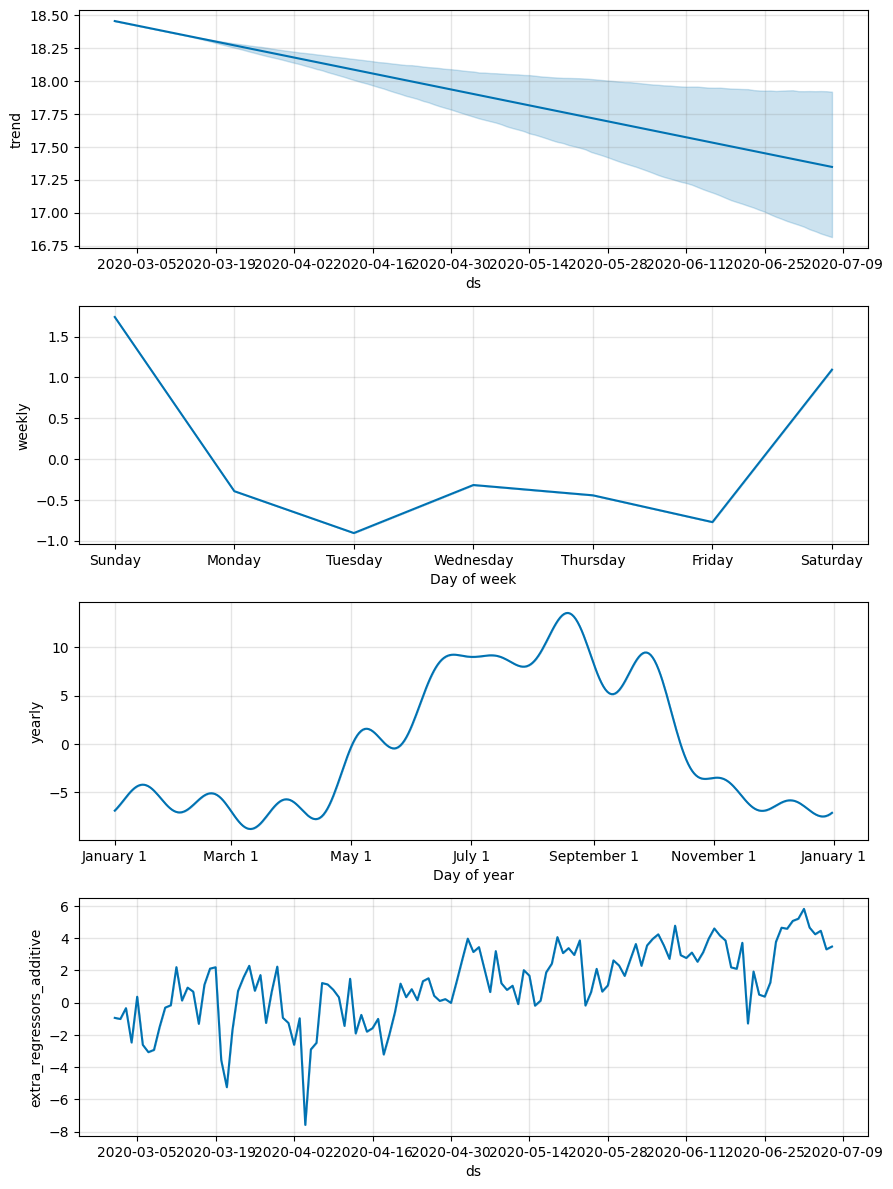

In [22]:
# 2
future = test[['ds'] + regresores].copy()
forecast_reg = modelo_reg.predict(future)

modelo_reg.plot(forecast_reg)
plt.title("Predicción con regresores (Modelo Prophet)")
plt.show()

modelo_reg.plot_components(forecast_reg) # componentes
plt.show()

In [23]:
train_pred = modelo_reg.predict(train[['ds'] + regresores])
mae_train = mean_absolute_error(train['y'], train_pred['yhat'])

mae_test = mean_absolute_error(test['y'], forecast_reg['yhat'])

print(f"MAE con regresores Train: {mae_train:.2f}")
print(f"MAE con regresores Test: {mae_test:.2f}")

MAE con regresores Train: 4.67
MAE con regresores Test: 4.50


In [24]:
error_train = train['y'].values - train_pred['yhat'].values
error_test = test['y'].values - forecast_reg['yhat'].values

error = pd.concat([
    pd.Series(error_train, index=train['ds']),
    pd.Series(error_test, index=test['ds'])
])

fig = px.line(x=error.index, y=error.values,
              labels={'x': 'Fecha', 'y': 'Error'},
              title='Error con regresores')
fig.show()

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

<Figure size 600x300 with 0 Axes>

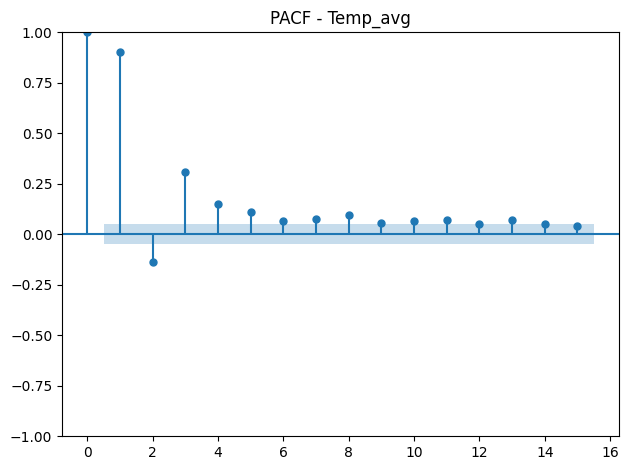

<Figure size 600x300 with 0 Axes>

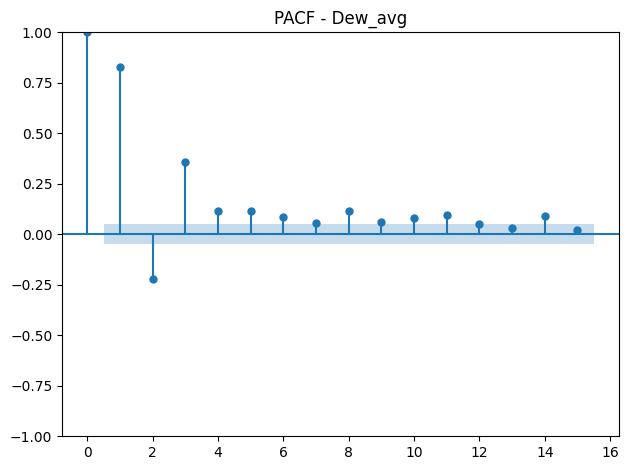

<Figure size 600x300 with 0 Axes>

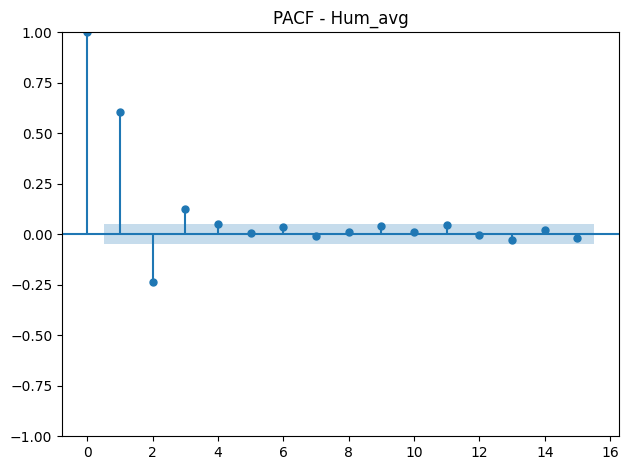

<Figure size 600x300 with 0 Axes>

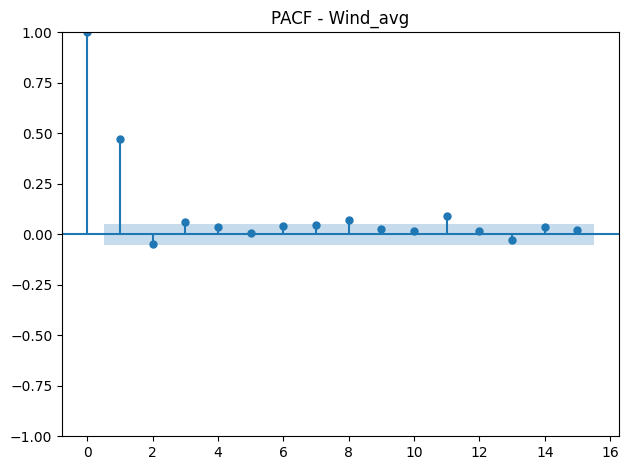

<Figure size 600x300 with 0 Axes>

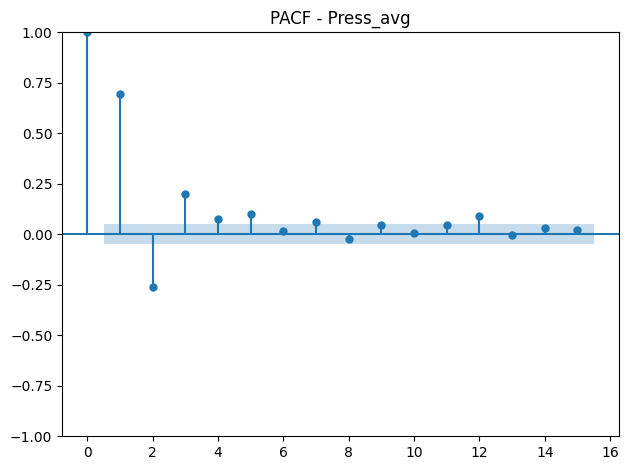

In [25]:
# 1
from statsmodels.graphics.tsaplots import plot_pacf

evogenas_avg = [col for col in df_completo.columns if col.endswith("_avg")]

for var in evogenas_avg:
    plt.figure(figsize=(6,3))
    plot_pacf(df_completo[var], lags=15, method='ywm', title=f'PACF - {var}')
    plt.tight_layout()
    plt.show()


In [26]:
# 2

lags_diccio = {
    "Temp_avg": [1, 2],
    "Dew_avg": [1, 2],
    "Hum_avg": [1],
    "Wind_avg": [1],
    "Press_avg": [1, 2]
}

df_lags = df_completo.copy()

for var, lags in lags_diccio.items():
    for lag in lags:
        df_lags[f"{var}_lag{lag}"] = df_lags[var].shift(lag)

In [ ]:
# 3
cols_lags = [col for col in df_lags.columns if '_lag' in col]

for col in cols_lags:
    df_lags[col].fillna(df_lags[col].mean(), inplace=True)


/var/folders/09/2_xdwnnx5rqgtl8vh2vwkdmc0000gn/T/ipykernel_2073/2763147681.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [28]:
# 4
df_lags = df_lags.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

train = df_lags[df_lags['ds'] <= '2020-02-29'].copy()
test  = df_lags[df_lags['ds'] >= '2020-03-01'].copy()

modelo_lags = Prophet()
regresores = list(lags_diccio.keys()) + cols_lags

for reg in regresores:
    modelo_lags.add_regressor(reg)

modelo_lags.fit(train)


21:44:59 - cmdstanpy - INFO - Chain [1] start processing
21:44:59 - cmdstanpy - INFO - Chain [1] done processing


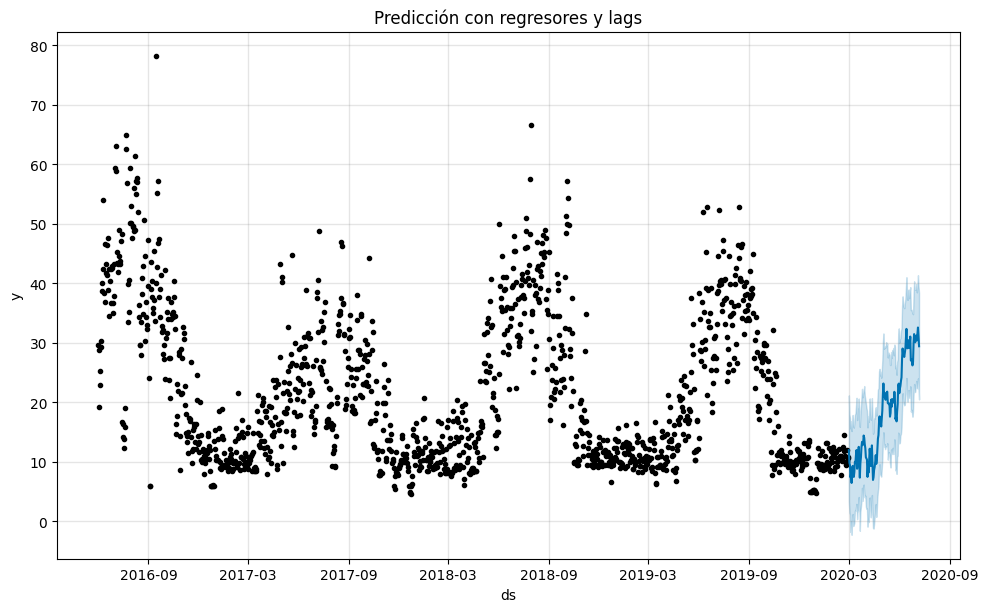

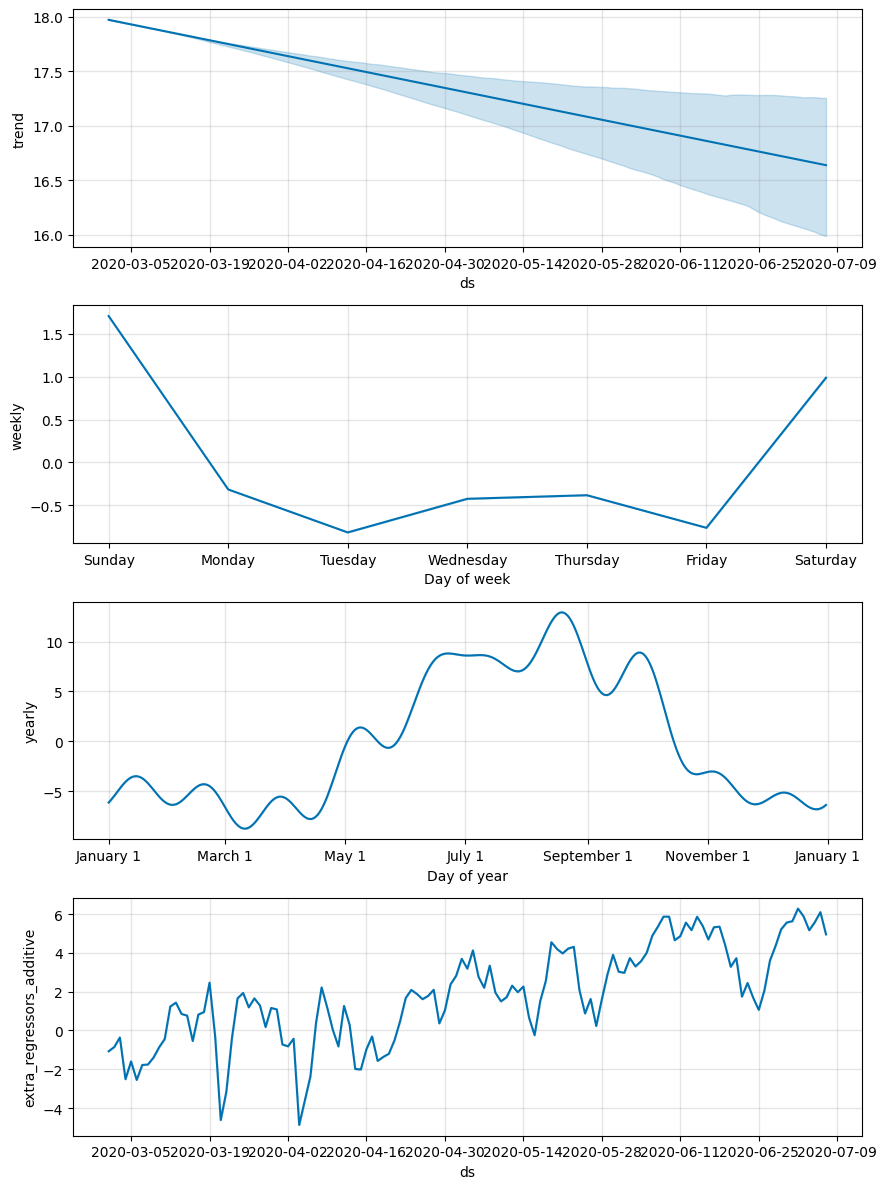

In [29]:
# 5
future = test[['ds'] + regresores]
forecast_lags = modelo_lags.predict(future)

modelo_lags.plot(forecast_lags)
plt.title("Predicción con regresores y lags")
plt.show()

modelo_lags.plot_components(forecast_lags)
plt.show()


In [30]:
# 6
forecast_train_lags = modelo_lags.predict(train[['ds'] + regresores])

mae_train = mean_absolute_error(train['y'], forecast_train_lags['yhat'])
mae_test = mean_absolute_error(test['y'], forecast_lags['yhat'])

print(f"MAE con lags - Entrenamiento: {mae_train:.2f}")
print(f"MAE con lags - Prueba: {mae_test:.2f}")


MAE con lags - Entrenamiento: 4.68
MAE con lags - Prueba: 4.48


podemos decir que el modelo mejora con los lags, pero muy poquito (menos del 1%)

In [31]:
# 7
error_train = train['y'].values - forecast_train_lags['yhat'].values
error_test = test['y'].values - forecast_lags['yhat'].values

error_total = pd.concat([
    pd.Series(error_train, index=train['ds']),
    pd.Series(error_test, index=test['ds'])
])

fig = px.line(x=error_total.index, y=error_total.values,
              labels={'x': 'Fecha', 'y': 'Error'},
              title='Error en la predicción (con lags)')
fig.show()


## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [32]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [33]:
param_grid = {
    'changepoint_prior_scale': [0.05, 0.1],
    'seasonality_prior_scale': [1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9]
}

features = list(lags_diccio.keys()) + [f"{var}_lag{lag}" for var in lags_diccio for lag in lags_diccio[var]]

tuning_results, best_params = optimize_prophet(train[['ds', 'y'] + features], test[['ds', 'y'] + features], features, param_grid)

print("Mejores parámetros encontrados:")
print(best_params)


Tuning Prophet parameters: 100%|██████████| 16/16 [00:06<00:00,  2.66it/s]

Mejores parámetros encontrados:
{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive', 'changepoint_range': 0.9}


In [34]:
modelo_opt = Prophet(**best_params)

for reg in features:
    modelo_opt.add_regressor(reg)

modelo_opt.fit(train[['ds', 'y'] + features])


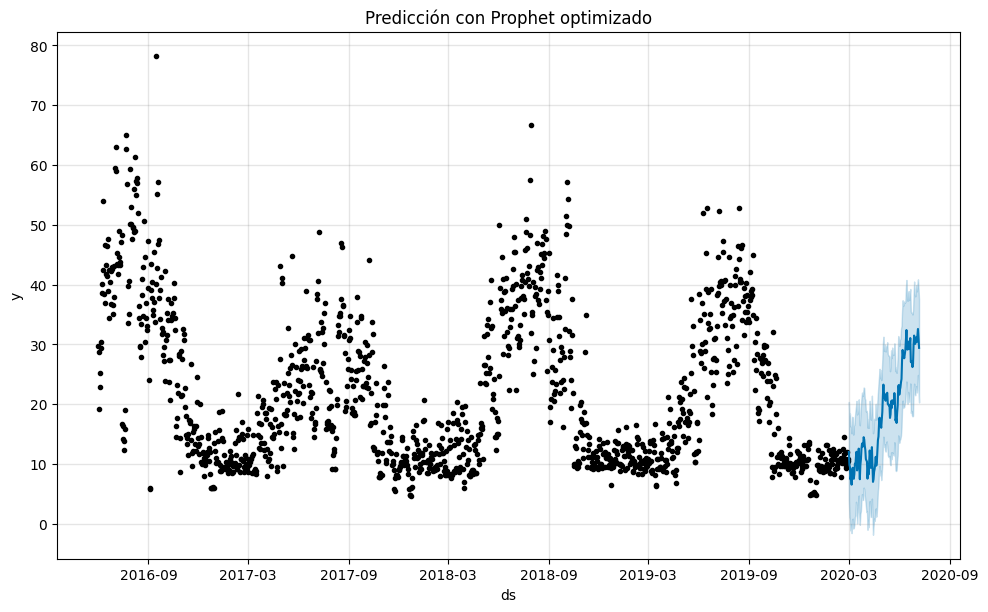

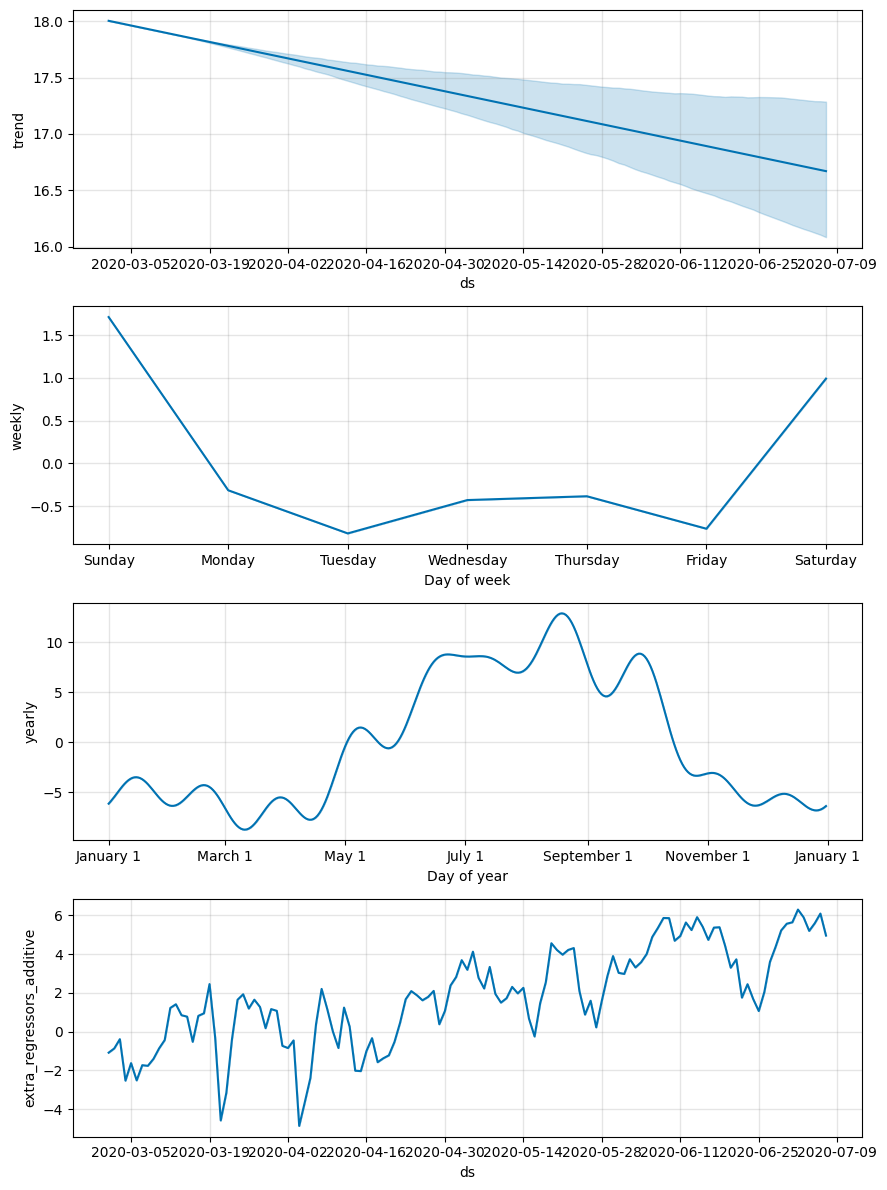

In [35]:
future = test[['ds'] + features]

forecast_opt = modelo_opt.predict(future)

modelo_opt.plot(forecast_opt)
plt.title("Predicción con Prophet optimizado")
plt.show()

modelo_opt.plot_components(forecast_opt)
plt.show()


In [36]:
forecast_train_opt = modelo_opt.predict(train[['ds'] + features])

mae_train_opt = mean_absolute_error(train['y'], forecast_train_opt['yhat'])
mae_test_opt = mean_absolute_error(test['y'], forecast_opt['yhat'])

print(f"MAE (entrenamiento, modelo optimizado): {mae_train_opt:.2f}")
print(f"MAE (prueba, modelo optimizado): {mae_test_opt:.2f}")


MAE (entrenamiento, modelo optimizado): 4.69
MAE (prueba, modelo optimizado): 4.46


In [37]:
error_train = train['y'].values - forecast_train_opt['yhat'].values
error_test = test['y'].values - forecast_opt['yhat'].values

error_total = pd.concat([
    pd.Series(error_train, index=train['ds']),
    pd.Series(error_test, index=test['ds'])
])

fig = px.line(x=error_total.index, y=error_total.values,
              labels={'x': 'Fecha', 'y': 'Error'},
              title='Error de predicción (modelo optimizado)')
fig.show()


# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [38]:
!pip install surprise

Defaulting to user installation because normal site-packages is not writeable


In [39]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [40]:
#CODIGO AQUI
path_cervezas = "cervezas.csv"
df_cervezas = pd.read_csv(path_cervezas)
df_cervezas.head()

,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,5.0,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,3.0,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,5.0,Sierra Nevada Celebration Ale,American IPA


Hay valores nulos? No, no hay valores nulos!

In [88]:
df_cervezas.isnull().values.any()

False

¿Cuántos ciudadanos están participando de esta evaluación? 706 ciudadanos (lo que indica que muchos ciudadanos en general son los que consumen alcohol, y que lo hacen de manera ilegal! XD).

In [91]:
len(df_cervezas["userId"].unique())

706

¿Cuántas cervezas se están evaluando? se están evaluando o calificando 3747 cervezas únicas o diferentes.

In [90]:
len(df_cervezas["beerId"].unique())

3747

## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

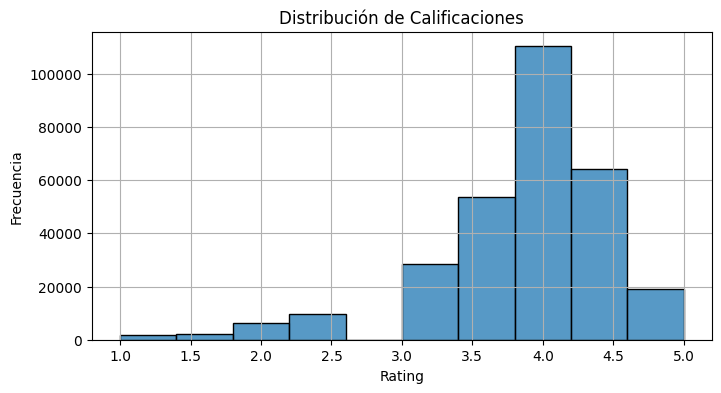

In [87]:
plt.figure(figsize=(8, 4))
sns.histplot(df_cervezas["rating"], bins=10)
plt.title("Distribución de Calificaciones")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [45]:
media_por_producto = df_cervezas.groupby("beerId")["rating"].mean()
media_por_producto

beerId
5        3.395000
6        3.765217
7        3.256849
9        3.478261
10       3.791908
           ...   
74827    4.100000
74904    3.896552
74986    4.274336
75013    4.242424
75086    3.753247
Name: rating, Length: 3747, dtype: float64

In [ ]:
#¿cuántos usuarios hay en los datos?
print("La cantidad de usuarios únicos en los datos es: ", df_cervezas["userId"].nunique())
print("La cantidad de productos únicos en los datos es: ", df_cervezas["beerId"].nunique())
print("La cantidad de calificaciones en los datos es: ", df_cervezas["rating"].nunique())
print("la cantidad de calificaciones faltantes en los datos es: ",
df_cervezas["rating"].isna().sum()  
)
print("la media de las calificaciones entregadas por los usuarios es: ", df_cervezas["rating"].mean())
print("como podemos ver de la tabla anterior, el promedio cambia por producto único, y va desde: ", media_por_producto.min(), " hasta ", media_por_producto.max())

La cantidad de usuarios únicos en los datos es:  706
La cantidad de productos únicos en los datos es:  3747
La cantidad de calificaciones en los datos es:  9
la cantidad de calificaciones faltantes en los datos es:  0
la media de las calificaciones entregadas por los usuarios es:  3.8603669096689135
como podemos ver de la tabla anterior, el promedio cambia por producto único, y va desde:  1.376923076923077  hasta  4.669491525423729


In [47]:
matriz_usuario_producto = df_cervezas.pivot_table(
    index="userId",
    columns="beerName",
    values="rating"
)
matriz_usuario_producto


beerName,"""Shabadoo"" Black & Tan Ale",# 100,#9,'t Gaverhopke Extra,'t Smisje Calva Reserva,(512) Pecan Porter,10 Commandments,10 Squared Fish Tale Ale,10.0,1000 IBU,...,Žatec,§ucaba (Abacus),Édition 2005,Éphémère (Apple),Éphémère (Cassis / Black Currant),Éphémère (Cranberry),Équinoxe Du Printemps,Ølfabrikken Porter,Über Pils,ÜberSun (Imperial Summer Wheat Beer)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De aquí podemos ver que la mayoría de los usuarios no ha valorado o calificado o evaluado la mayoría de los productos (en este caso cervezas), lo que significa que debemos usar un sistema de recomendación a modo de regresión para poder rellenar estos valores nulos, lo que haremos en la sección 2.6. Además, podemos decir que es una matriz con muchos valores faltantes que predecir!

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [48]:
#CODIGO AQUI

#1. Primero que todo creamos un dataframe que contiene las características de las cervezas, 
# excluyendo las evaluaciones de los ciudadanos (o ratings)
df_features_beer = df_cervezas.copy()
df_features_beer = df_features_beer.drop(columns=["rating"])

df_features_beer.drop_duplicates

<bound method DataFrame.drop_duplicates of         userId  beerId                            beerName  \
0          144     995                            Mai Bock   
1           63   58695  Hop In The Dark Cascadian Dark Ale   
2          147    4083                 Stone Ruination IPA   
3         4261   40310                     Noël Des Géants   
4          140    1904       Sierra Nevada Celebration Ale   
...        ...     ...                                 ...   
295054     863   45653                        Consecration   
295055     306    1341                      Keystone Light   
295056       8    8917                      Drop Top Amber   
295057      35     102            Samuel Adams Octoberfest   
295058   18149   38149                           Cable Car   

                             beerStyle  
0                Maibock / Helles Bock  
1                   American Black Ale  
2       American Double / Imperial IPA  
3                 Herbed / Spiced Beer  
4      

In [ ]:
#Notemos como los datos contienen múltiples calificaciones para cada película. Recordando que este tipo de modelo no necesita 
#de las interacciones usuario-producto, es posible entonces reducir la dimensionalidad de nuestro dataset a 1 fila por películas agrupando:

df_bow = df_features_beer.groupby('beerId')[['beerName', 'beerStyle']].first().reset_index() # solo nos quedamos con atributos de productos
df_bow


,beerId,beerName,beerStyle
0,5,Amber,Vienna Lager
1,6,Turbodog,English Brown Ale
2,7,Purple Haze,Fruit / Vegetable Beer
3,9,Golden,American Pale Lager
4,10,Allagash Dubbel Ale,Dubbel
...,...,...,...
3742,74827,Lips Of Faith - Fresh Hop India Pale Ale,American IPA
3743,74904,Allies Win The War!,English Strong Ale
3744,74986,Lagunitas Sucks Holiday Ale,American Double / Imperial IPA
3745,75013,Firestone 15 - Anniversary Ale,American Strong Ale


In [ ]:
#2. Ahora implementamos el método de Bag Of Words para procesar la columna beerStyle, hay cuatro pasos:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # instanciamos BoW
bow = vectorizer.fit_transform(df_bow['beerStyle']).toarray() # Vectorizamos texto
bow = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out()) # Transformamos a Dataframe

vectorizer = CountVectorizer(lowercase = True, # transformación a minúsculas
                             min_df = 10, # filtramos las palabras que aparecen mínimo en 10 documentos
                             stop_words = 'english') # eliminamos stopwords
bow = vectorizer.fit_transform(df_bow['beerStyle']).toarray() # Vectorizamos texto
bow = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out()) # Transformamos a Dataframe
bow

,adjunct,ale,altbier,amber,american,apa,baltic,barleywine,beer,belgian,...,vienna,warmer,wee,weizenbock,wheat,wheatwine,wild,winter,witbier,zwickel
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3743,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3744,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3745,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#3. Escribir una función que imprima las top 5 cervezas simliares a Chocolate Porter, utilizando la métrica de similitud coseno

# importamos cosine_similarity de sklearn
from sklearn.metrics.pairwise import cosine_similarity

# calculamos la similitud coseno de cada vector generado contra el resto, que resulta ser una matriz
cosine_sim = cosine_similarity(bow, bow)

def get_recommendations(df, beer, k = 5):
  """
  Devuelve las k cervezas más similares usando Bag Of Words (BOW)
    Input:
      df: dataframe con el BOW
      beer: nombre de la cerveza (en la columna del df original `beerName`)
      k: cantidad de cervezas más similares
    Output: 
      recomendación con las k cervezas más similares.
  """
  assert beer in df['beerName'].values, 'la cerveza no está contenida en el dataset!'

  indice = df[df['beerName'] == beer].index[0]#extraemos el primer índice que satisface la igualdad

  sim_scores = list(enumerate(cosine_sim[indice]))#extraemos las similitudes de la cerveza beer con todas las demás 
                                                  #y las convertimos en una lista de tuplas (índice, similitud).
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)#ordenamos dicha lista de mayor a menor similitud
  sim_scores = sim_scores[1:k+1]#seleccionamos las k cervezas más parecidas, omitiendo la primera, 
                                #porque en el fondo es la misma cerveza `beer`

  beer_indices = [i[0] for i in sim_scores]#extraemos solo los indices de esas k cervezas mas parecidas
  return df['beerName'].iloc[beer_indices].values#devolvemos los nombres de esas cervezas parecidas

print('Las primeras 5 cervezas recomendadas parecidas a Chocolate Porter son: ' + 
      ', '.join(get_recommendations(df = df_bow, beer = 'Chocolate Porter')))


Las primeras 5 cervezas recomendadas parecidas a Chocolate Porter son: Blackhook Porter, Anchor Porter, Coffeehouse Porter, Drayman's Porter, Stone Smoked Porter


In [102]:
#4. Identificaremos ahora la cerveza mejor evaluada por Carl (userId = 100) 
# y obtenemos las top 5 cervezas similares a esa cerveza. 


# primero rescatamos la cerveza mejor evaluada por el usuario (en nuestro caso Carl)
userId = 100 # usuario a recomendar
user_beers = df_cervezas[df_cervezas['userId'] == userId].sort_values('rating', ascending = False) # cervezas calificadas por el usuario
best_beer = user_beers.iloc[0]['beerName'] # cerveza con mejor rating
print(f'La cerveza más querida por {userId} (Carl): {best_beer}')




# finalmente, printeamos las k mejores recomendaciones para el usuario
print("ahora las 5 mejores recomendaciones o similares a esa cerveza: "+
      ",".join(get_recommendations(df = df_bow, beer = best_beer)))

La cerveza más querida por 100 (Carl): McNeill's Firehouse Amber Ale
ahora las 5 mejores recomendaciones o similares a esa cerveza: Full Sail Amber,McNeill's Firehouse Amber Ale,Grail Ale,American Amber Ale,Ruedrich's Red Seal Ale


## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [ ]:
#CODIGO AQUI

#1. transformamos el dataframe de pandas a dataset de surprise,
# utilizando solamente los identificadores de ciudadano, cerveza y rating
from surprise import Reader, Dataset

reader = Reader(rating_scale = (0, 5)) # instanciamos reader, es importante definir la escala de los valores (ratings) está entre 0 y 5 

df_collaborative = df_cervezas[['userId', 'beerId', 'rating']].copy() # ordenamos dataset en user, beer, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise
anti_set = dataset.build_full_trainset().build_anti_testset()#construimos un trainset completo con todos los datos observados
                                                             #a partir del cual construimos el ant-test set, que contiene todas 
                                                             #las combinaciones (usuario, beer) que no tienen calificacion en el 
                                                             #conjunto original
dataset

La transformación del DataFrame de pandas a un Dataset de surprise sí depende del orden de las columnas. Surprise espera un dataframe con exactamente tres columnas en el siguiente orden: (user, ítem, rating)

In [54]:
anti_set

[(144, 58695, 3.8603669096689135),
 (144, 4083, 3.8603669096689135),
 (144, 40310, 3.8603669096689135),
 (144, 1904, 3.8603669096689135),
 (144, 409, 3.8603669096689135),
 (144, 16858, 3.8603669096689135),
 (144, 25061, 3.8603669096689135),
 (144, 14309, 3.8603669096689135),
 (144, 13906, 3.8603669096689135),
 (144, 59145, 3.8603669096689135),
 (144, 2931, 3.8603669096689135),
 (144, 188, 3.8603669096689135),
 (144, 1696, 3.8603669096689135),
 (144, 619, 3.8603669096689135),
 (144, 811, 3.8603669096689135),
 (144, 1792, 3.8603669096689135),
 (144, 1157, 3.8603669096689135),
 (144, 41716, 3.8603669096689135),
 (144, 38334, 3.8603669096689135),
 (144, 4924, 3.8603669096689135),
 (144, 5068, 3.8603669096689135),
 (144, 4700, 3.8603669096689135),
 (144, 36748, 3.8603669096689135),
 (144, 8297, 3.8603669096689135),
 (144, 1116, 3.8603669096689135),
 (144, 1331, 3.8603669096689135),
 (144, 411, 3.8603669096689135),
 (144, 20762, 3.8603669096689135),
 (144, 37298, 3.8603669096689135),
 (144, 

In [55]:
#2. Generemos un conjunto de entrenamiento y otro de prueba, asegurando que el 30% de los datos sean destinados al test set. No olvidar
# fijar una semilla para garantizar reproducibilidad. 
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data = dataset, test_size = 0.3, random_state = 3380)
trainset

### También nos agarramos de esta referencia https://gist.github.com/pankajti/e631e8f6ce067fc76dfacedd9e4923ca

In [ ]:
#3. Ahora entrenamos un modelo de KNN basado en usuarios utilizando
# similitud coseno y también realizamos predicciones sobre el conjunto de prueba.
from surprise import KNNWithMeans

sim_options = { 'name': 'cosine' ,'user_based':  True}#user_based= True dice que el modelo es basado en usuario
algo_user = KNNWithMeans(k =3 , sim_options = sim_options)#elegimos los 3 usuarios mas cercanos

algo_user.fit(trainset)#aqui entrenamos el modelo
predictions = algo_user.test(testset)#realizamos predicciones en el conjunto de prueba

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [57]:
#4. Ahora calculamos el RMSE
mae = accuracy.mae(predictions, verbose=True)

MAE:  0.5336


Como podemos ver, el MAE es de aproximadamente 0.5336, y teniendo en cuenta que el rango de los ratings es de 5, podemos decir que la predicción de los ratings en promedio se halla un 12% aproximadamente lejos del rating real. 

In [58]:
#y ahora calculamos las predicciones sobre el conjunto de prueba
predictions

[Prediction(uid=651, iid=52043, r_ui=3.5, est=3.8333333333333335, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=10099, iid=6260, r_ui=5.0, est=4.0, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=140, iid=37477, r_ui=4.5, est=4.333333333333333, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=148, iid=25989, r_ui=5.0, est=3.8333333333333335, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=1837, iid=5245, r_ui=4.0, est=4.5, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=610, iid=3158, r_ui=4.5, est=3.8333333333333335, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=39, iid=133, r_ui=4.5, est=4.333333333333333, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=112, iid=1867, r_ui=5.0, est=3.3333333333333335, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=35, iid=60064, r_ui=2.5, est=3.6666666666666665, details={'actual_k': 3, 'was_imposs

In [ ]:
#3. Ahora entrenamos un modelo de KNN basado en productos utilizando
# similitud coseno y también realizamos predicciones sobre el conjunto de prueba.
from surprise import KNNWithMeans

sim_options_product = { 'name': 'cosine' ,'user_based':  False}#igual a False es basado en productos
algo_product = KNNWithMeans(k =3 , sim_options_product = sim_options_product)#elegimos los 3 usuarios mas cercanos

algo_product.fit(trainset)#aqui entrenamos el modelo
predictions_product = algo_product.test(testset)#realizamos predicciones en el conjunto de prueba
#4. Ahora calculamos el RMSE
mae_product = accuracy.mae(predictions_product, verbose=True)
mae_product
#y ahora calculamos las predicciones sobre el conjunto de prueba
predictions_product

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.5336


[Prediction(uid=651, iid=52043, r_ui=3.5, est=3.8333333333333335, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=10099, iid=6260, r_ui=5.0, est=4.0, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=140, iid=37477, r_ui=4.5, est=4.333333333333333, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=148, iid=25989, r_ui=5.0, est=3.8333333333333335, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=1837, iid=5245, r_ui=4.0, est=4.5, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=610, iid=3158, r_ui=4.5, est=3.8333333333333335, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=39, iid=133, r_ui=4.5, est=4.333333333333333, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=112, iid=1867, r_ui=5.0, est=3.3333333333333335, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=35, iid=60064, r_ui=2.5, est=3.6666666666666665, details={'actual_k': 3, 'was_imposs

Aquí lo mismo que en la sección anterior, puesto que podemos decir que en promedio las predicciones de los ratings se alejan un 12% de las predicciones reales, lo que es muy bueno!

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [61]:
beers = df_cervezas[['beerId' , 'beerName']].drop_duplicates(['beerId' , 'beerName'])
users = df_cervezas[['userId']].drop_duplicates(['userId'])

In [ ]:
#CODIGO AQUI
from surprise import NMF

#1. empezamos con NMF, fijando la semilla y generando predicciones para el conjunto de prueba
model = NMF(random_state = 3380) # instanciamos modelo NMF
model.fit(trainset) # fit del modelo, o más conocido como entrenamiento del mismo
predictions = model.test(testset) # retorna un dataframe con el rating estimado para cada (user_id, item_id)

#2. calculamos el mae de las predicciones obtenidas y mostramos los resultados en un dataframe para el análisis
accuracy.mae(predictions) 
df_predictions = pd.DataFrame(predictions)
df_predictions.drop(columns = ['details'])


MAE:  0.4806


,uid,iid,r_ui,est
0,651,52043,3.5,3.705730
1,10099,6260,5.0,3.919372
2,140,37477,4.5,3.968601
3,148,25989,5.0,3.694468
4,1837,5245,4.0,4.005753
...,...,...,...,...
88513,651,6076,4.5,4.070604
88514,143,1352,3.0,3.314464
88515,863,22790,4.5,4.372749
88516,12985,47941,4.0,3.982615


Como podemos ver, el MAE es menor que para el caso de enfoque de filtro colaborativo, pues baja de 0.5336 a 0.4806

In [ ]:

#3. ahora lo mismo pero con SVD
model_SVD = SVD(random_state=3380)
model_SVD.fit(trainset) # fit del model_SVD
predictions_SVD = model_SVD.test(testset) 
accuracy.mae(predictions_SVD) 
df_predictions_SVD = pd.DataFrame(predictions_SVD)
df_predictions_SVD.drop(columns = ['details'])

MAE:  0.4627


,uid,iid,r_ui,est
0,651,52043,3.5,3.828563
1,10099,6260,5.0,3.846123
2,140,37477,4.5,4.103933
3,148,25989,5.0,3.884248
4,1837,5245,4.0,3.951498
...,...,...,...,...
88513,651,6076,4.5,4.169155
88514,143,1352,3.0,3.235534
88515,863,22790,4.5,4.327937
88516,12985,47941,4.0,3.797389


Y también podemos ver que el MAE disminuye considerablemente, de hecho dos centésimas con respecto al modelo NMF, por lo que podemos decir que es el mejor modelo de momento.

In [105]:
anti_pre = model_SVD.test(anti_set)
pred_df = pd.DataFrame(anti_pre).merge(beers , left_on = ['iid'], right_on = ['beerId'])
pred_df = pd.DataFrame(pred_df).merge(users , left_on = ['uid'], right_on = ['userId'])

In [106]:
#prediccion para el userId==100, que es Carl!
pred_df[(pred_df['est']>3.0)&(pred_df['userId']==100)]

,uid,iid,r_ui,est,details,beerId,beerName,userId
1712750,100,995,3.860367,3.838581,{'was_impossible': False},995,Mai Bock,100
1712751,100,58695,3.860367,3.894095,{'was_impossible': False},58695,Hop In The Dark Cascadian Dark Ale,100
1712752,100,4083,3.860367,3.994656,{'was_impossible': False},4083,Stone Ruination IPA,100
1712753,100,40310,3.860367,3.777848,{'was_impossible': False},40310,Noël Des Géants,100
1712754,100,1904,3.860367,4.105683,{'was_impossible': False},1904,Sierra Nevada Celebration Ale,100
...,...,...,...,...,...,...,...,...
1716487,100,47589,3.860367,3.756558,{'was_impossible': False},47589,Red,100
1716488,100,62792,3.860367,3.588778,{'was_impossible': False},62792,Splinter Black,100
1716489,100,18432,3.860367,3.284774,{'was_impossible': False},18432,Wittekerke Rosé,100
1716490,100,4753,3.860367,3.894250,{'was_impossible': False},4753,Hambleton Nightmare (Extra Stout Porter),100


El mejor modelo es aquel que usa SVD, porque tiene un MAE menor, por lo que las predicciones de las calificaciones de las cervezas son más precisas. 

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]

2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]


In [66]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Esta función calcula la precision@k y el recall@k por usuario para
    un sistema de recomendación.
        Input:
            predictions: son las predicciones generadas por un modelo
            k: cuántas recomendaciones considerar por usuario.
            threshold: umbral a considerar una calificación como relevante. 
                       ratings mayores o iguales a este valor se consideran 
                       "buenas recomendaciones".
        Ouput:
            precisions, recalls: métricas que nos dicen qué tan bueno es el
                                 sistema de recomendación.
    """
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [ ]:
#Desarrolle su código aquí

#1. definimos primero que todo la funcion que extrae las N mejores cervezas recomendadas
#para cada ciudadano
def get_top_n(N, pred_df):
    """Extrae las `N` mejores cervezas 
    recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor
    modelo seleccionado en la sección anterior, que en nuestro caso es el SVD. 
        Input: 
            N: numero que indica las primeras n recomendaciones
            pred_df: dataframe que contiene las predicciones
        Output:
            top_n_df: dataframe que contiene las primeras n recomendaciones para todos
            los usuarios usando el mejor modelo de la sección anterior
    """
    #primero eliminamos las predicciones duplicadas (por si hay más de una fila por misma uid-iid),
    #donde el iid vendría siendo el item o product id, en nuestro caso, el id de la cerveza
    pred_df_clean = pred_df.drop_duplicates(subset=['uid', 'iid'])

    #en segundo lugar, ordenamos primero por "uid" en orden ascendente y por "iid" 
    #en orden descendente, o sea de mayor a menor rating estimado
    pred_df_sorted = pred_df_clean.sort_values(by=['uid', 'est'], ascending=[True, False])

    #por último agregamos por usuario, seleccionamos las N primeras predicciones 
    #y luego devolvemos un dataframe
    top_n_df = pred_df_sorted.groupby('uid').head(N).reset_index(drop=True)

    return top_n_df

#obtenemos el df que contiene todos las recomendaciones para todos los usuarios, digamos para
#las primeras 10 recomendaciones. 
get_top_n(10, pred_df)

,uid,iid,r_ui,est,details,beerId,beerName,userId
0,1,61100,3.860367,4.370841,{'was_impossible': False},61100,King Henry,1
1,1,42816,3.860367,4.350243,{'was_impossible': False},42816,Isabelle Proximus,1
2,1,47658,3.860367,4.329938,{'was_impossible': False},47658,Founders CBS Imperial Stout,1
3,1,62397,3.860367,4.318587,{'was_impossible': False},62397,Rare Bourbon County Stout,1
4,1,1093,3.860367,4.287245,{'was_impossible': False},1093,Two Hearted Ale,1
...,...,...,...,...,...,...,...,...
7055,27681,74986,3.860367,4.133960,{'was_impossible': False},74986,Lagunitas Sucks Holiday Ale,27681
7056,27681,17112,3.860367,4.130274,{'was_impossible': False},17112,Bell's Hopslam Ale,27681
7057,27681,42474,3.860367,4.124881,{'was_impossible': False},42474,Lips Of Faith - Eric's Ale,27681
7058,27681,1093,3.860367,4.123924,{'was_impossible': False},1093,Two Hearted Ale,27681


Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`).

In [ ]:
df_10 = get_top_n(3, pred_df)
top_10 = df_10[df_10["userId"]==100]
print(top_10["beerName"])

165    Founders CBS Imperial Stout
166              Isabelle Proximus
167         Double Chocolate Stout
Name: beerName, dtype: object


In [86]:
#2.Realice predicciones de rating para 5 cervezas aleatorias no
#evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]

#queremos obtener un df que contenga las calificaciones de cervezas para un usuario dado: digamos, Carl

df_10000 = get_top_n(10000, pred_df)#aqui obtenemos el dataframe con las primeras 10000 cervezas recomendadas
df_10000_filtrado = df_10000[df_10000["userId"]==100]#luego nos fijamos solo en el usuario de id=100 que es Carl

beer_ids_usuario_100 = df_cervezas[df_cervezas["userId"]==100]#luego obtenemos las cervezas del dataframe original que 
                                                              #ya fueron valoradas por Carl

df_100_filtrado = df_10000_filtrado[~df_10000_filtrado["beerId"].isin(beer_ids_usuario_100)].copy()#luego obtenemos las cervezas 
                                                                                                   #aún no valoradas por Carl

df_5_aleatorias = df_100_filtrado.sample(n=5, random_state=40)#luego usando una muestra o sample obtenemos fijando la semilla
                                                              #5 recomendaciones de cervezas que aún no ha valorado Carl


Ahora mostramos 5 cervezas seleccionadas aleatoriamente para recomendarle a Carl!

In [ ]:
df_5_aleatorias#las imprimimos para verlas

In [70]:
#3. Calcule los promedios de `precisión@k` y el `recall@k`
#para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? 
#`Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]

precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=3.5)#hacemos uso del hint

avg_precision = sum(precisions.values()) / len(precisions)#luego calculamos la precision promedio
avg_recall = sum(recalls.values()) / len(recalls)#y también el recall promedio
print(f'Precision@10: {avg_precision:.4f}')#y los imprimimos
print(f'Recall@10: {avg_recall:.4f}')


Precision@10: 0.7313
Recall@10: 0.3287


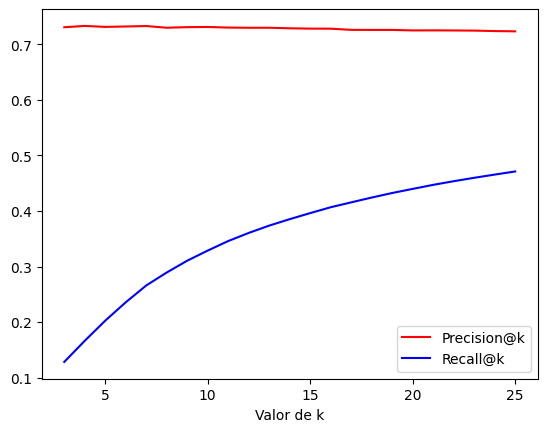

In [71]:
#4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre
# 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento 
# de las curvas de precisión y recall en función de `k`. [1 punto]

ks = range(3, 26)#valores de k que varían entre 3 y 25 con paso de 1 unidad
lista_precision, lista_recall = [], []#definimos listas vacías que iremos llenando con 
                            #los promedios de las precisiones y recalls.

for k in ks:
    precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)
    precision_promedio = sum(precisions.values()) / len(precisions)
    recall_promedio = sum(recalls.values()) / len(recalls)
    lista_precision.append(precision_promedio)
    lista_recall.append(recall_promedio)

plt.plot(ks, lista_precision, color="red", label="Precision@k")
plt.plot(ks, lista_recall, color="blue", label="Recall@k")
plt.xlabel(xlabel="Valor de k")
plt.legend()
plt.show()

Como podemos ver del gráfico, el recall va aumentando casi a un ritmo logarítmico, mientras que la precisión va disminuyendo o casi se mantiene constante. De hecho, si nos extendemos hasta un valor de 100, podemos ver que ambos valores convergen a un mismo valor. Esto quiere decir que a medida que aumentamos la cantidad de recomendaciones el sistema de recomendación se vuelve más útil, pero más que nada porque incluye todos las posibles cervezas que un tipo podría querer (porque en realidad las incluye todas, o todas las que recomienda son muy cercanas).

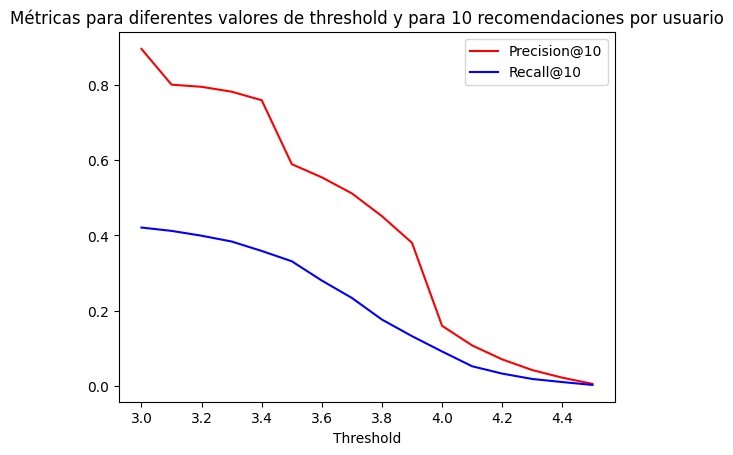

In [75]:
#5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. 
# Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]

thresholds = np.arange(3.0, 4.6, 0.1)#hacemos lo mismo que en la sección anterior pero ahora modificando los threshold y dejando fijo k
lista_precision, lista_recall = [], []
k_fijo =10
for t in thresholds:
    precisions, recalls = precision_recall_at_k(predictions, k=k_fijo, threshold=t)
    lista_precision.append(sum(precisions.values()) / len(precisions))
    lista_recall.append(sum(recalls.values()) / len(recalls))
    
plt.plot(thresholds, lista_precision, color="red", label=f"Precision@{k_fijo}")
plt.plot(thresholds, lista_recall, color="blue", label=f"Recall@{k_fijo}")
plt.title(f"Métricas para diferentes valores de threshold y para {k_fijo} recomendaciones por usuario")
plt.xlabel(xlabel="Threshold")
plt.legend()
plt.show()


Como podemos ver del gráfico, tanto el recall@10 como la precisión@10 disminuyen hasta casi anularse, a medida que aumenta 
el valor del `threshold`. Ambos valores o métricas parecen converger al mismo valor. Esto quiere decir que a medida que nos volvemos más exigentes (un threshold mayor), la calidad del sistema de recomendación disminuye para 10 recomendaciones por usuario.

In [ ]:
from itertools import product#importamos esta librería para poder generar el producto
                             #cartesiano entre dos listas, todos los pares posibles
                             #entre usuarios y cervezas.
from tqdm import tqdm#y esta otra para poder mostrar una barra de progreso, lo que es muy cool!

#6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]


# primero que todo creamos una matriz que contiene todos los pares posibles
usuarios = df_cervezas["userId"].unique()#valores únicos de usuarios
cervezas = df_cervezas["beerId"].unique()#id's únicos de cervezas
#creamos el producto cartesiano:
df_todo_par = pd.DataFrame(product(usuarios, cervezas), columns=["userId", "beerId"])


# ahora filtramos los pares que ya están calificados en el df_cervezas original
df_calificados = df_cervezas[["userId", "beerId"]]
df_faltantes = pd.merge(df_todo_par,
                        df_calificados, 
                        on=["userId", "beerId"],#el merge se hace utilizando estas columnas
                        how="left",#hace un left join, si no hay coincidencia rellena con NaN
                        indicator=True)#con esta linea se agrega una columna _merge
                                       #que indica si el par estaba solo en df_todo_par
                                       #o también en df_calificados.
                                       
# ahora filtramos solo los que están en df_todo_par pero no en df_calificados, es decir
#los que faltan por calificar. 
df_faltantes = df_faltantes[df_faltantes["_merge"] == "left_only"].drop(columns=["_merge"])

# por último obtenemos los ratings o calificaciones faltantes con el modelo SVD
predichos = []
for _, fila in tqdm(df_faltantes.iterrows(), total=len(df_faltantes)):#recorremos todas las filas de df_faltantes 
                                                                      #que contienen los pares sin rating. _ indica el índice
    pred = model_SVD.predict(fila["userId"], fila["beerId"]).est      #.predict devuelve un objeto `Prediction` y `.est` extrae
                                                                      #el rating estimado (est viene de estimado)
    predichos.append(pred)
df_faltantes["rating"] = predichos #creamos una nueva columna "rating" en df_faltantes con los valores estimados de ratings

# luego unimos con los ratings reales
df_completo = pd.concat([df_cervezas, df_faltantes], ignore_index=True)#ignore_index hace que se reinicie el índice del nuevo dataframe

In [ ]:

# y creamos la matriz (usuario x cerveza), eliminando duplicados (quedándonos con el primero que aparezca)
df_completo = df_completo.drop_duplicates(subset=["userId", "beerId"], keep="first")
matriz_final = df_completo.pivot(index="userId", columns="beerId", values="rating")

#con la siguiente línea verificamos que no tenga valores nulos, 
#porque al fin y al cabo lo que queremos es que prediga todas las calificaciones o 
#ratings de todas las cervezas para todos los usuarios:
assert not matriz_final.isnull().values.any()

#ahora sí, vemos las predicciones de SVD para todos los pares de (usuario, cerveza):
matriz_final



beerId,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
userId,,,,,,,,,,,,,,,,,,,,,
1,3.633981,3.932572,3.594238,3.786664,3.668864,3.674625,3.805927,3.738121,3.637945,4.024393,...,3.738455,4.079376,3.907120,3.972047,3.763963,3.955898,3.835542,4.026939,4.022591,3.667049
3,1.000000,5.000000,3.500000,3.500000,3.434803,3.467652,3.675326,3.555449,3.426894,3.755936,...,3.514205,3.843945,3.687817,3.804619,3.488504,3.821250,3.743226,3.897359,3.802713,3.442267
4,3.804643,4.076854,3.766177,3.942559,4.000000,3.822867,4.041263,3.938438,3.778786,4.140300,...,3.867100,4.211668,4.099062,4.137758,3.885894,4.137556,4.080171,4.260528,4.125102,3.799916
5,3.794847,3.840844,3.662148,3.757130,3.806371,4.000000,3.951089,3.697814,3.708409,3.924081,...,3.850900,4.102354,4.124561,4.056915,3.751358,3.949511,3.933207,4.056069,3.954506,3.644302
6,3.780513,3.903394,3.621785,3.979782,3.753115,3.778102,4.000000,3.697982,3.741176,4.005887,...,3.735610,4.092180,4.142459,4.173572,3.730994,4.004812,3.929813,4.062502,4.140578,3.704222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,3.865292,4.057455,3.759635,3.998435,3.741821,3.872454,4.086694,4.196855,3.775818,4.171929,...,3.897103,4.180981,4.043473,4.003250,3.983210,4.082796,4.067545,4.297422,4.111076,3.790905
25317,3.630116,3.826221,3.617018,3.745545,3.665711,3.638809,3.679626,3.734169,3.691477,3.929433,...,3.587290,4.082714,3.951292,3.852704,3.675286,3.977856,3.938354,3.892071,3.978520,3.532968
25923,3.901920,4.013213,3.771630,4.095072,3.837681,3.870520,4.142362,3.901717,3.700661,4.074852,...,3.801194,4.136819,4.273424,4.262832,3.738927,4.141780,3.883622,4.382472,4.070882,3.817815


# Conclusión

podemos ver la siguiente tabla resumen de cada uno de los sistemas de recomendación:

| **Criterio**                     | **Basado en Contenido** | ** Filtro Colaborativo (Memoria)** | ** Filtro Colaborativo (Modelo)** |
|----------------------------------|--------------------------|-----------------------------|----------------------------|
| Usa solo datos del ítem         | Sí                       | No                          | No                         |
| Usa datos de usuarios similares | No                       | Sí                          | Sí                         |
| Escalabilidad                   | Sí                       | No                          | Sí                         |
| Precisión en grandes datasets   | No                       | depende                          | Sí                         |
| Requiere muchas interacciones   | No                       | Sí                          | Sí                         |
| Soporta modelos híbridos        | depende                       | depende                          | Sí                         |


Además, podemos decir que el mejor modelo para nuestro caso fue el SVD, con un MAE de 0.46 aproximadamente, y con buenas métricas de precisión y recall, mientras el threshold aplicado (menor a 3.4 o 3.5) y el k fuera mayor a 25 (es decir, mayor a 25 recomendaciones)


Éxito!
<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
